# Neural Network From Scratch 

In [1]:
"""
This code is a tutorial on how to build a neural network from scratch in an easy way. 
It covers building layers, and implementing loss functions and includes a small explanation of each piece of code. 
The tutorial also tests the neural network with spiral data.
I wrote down everything I learned from every cell in it.
"""

'\nThis code is a tutorial on how to build a neural network from scratch in an easy way. \nIt covers building layers, and implementing loss functions and includes a small explanation of each piece of code. \nThe tutorial also tests the neural network with spiral data.\nI wrote down everything I learned from every cell in it.\n'

In [1]:
import numpy as np 
import nnfs
from nnfs.datasets import spiral_data 
import matplotlib.pyplot as plt
import math 

In [2]:
inputs = [1,2,3] # inputs for neurons in input layers  
weights = [0.2,0.8,-0.5 ] # each input has a weight 
bias  = 2 

outputs = inputs[0] * weights [0] +  inputs[1] * weights[1] + inputs[2] * weights [2] + bias  # this output of just one nuorn 
print(outputs)

2.3


In [7]:
inputs = [1, 2, 3,2.5]  # inputs for 

weights1 = [0.2,0.8 ,-0.5,1.0] # all weights for neuorn 1 
weights2 = [0.5,-0.91,0.26,-0.5] # all weights for neuorn 2 
weights3 = [-0.26,-0.27,0.17,0.87] # all weights for neuorn 3 

bias1 = 2
bias2 = 3
bias3 = 0.5

output_from_layer_1 = [inputs[0] * weights1[0] +  inputs[1] * weights1[1] + inputs[2] * weights1 [2] +  inputs[3] * weights1 [3] + bias1 , # this output of just one nuorn from layer1 
         inputs[0] * weights2[0] +  inputs[1] * weights2[1] + inputs[2] * weights2[2] + inputs[3] * weights2 [3] +  bias2,  
         inputs[0] * weights3[0] +  inputs[1] * weights3[1] + inputs[2] * weights3[2] +  inputs[3] * weights3[3]  +bias3]

# output_from_layer_1 => each output from each neuron in layer 1 
# Each neuron has a unique set of weights and its bais
print(output_from_layer_1)

[4.8, 1.21, 2.385]


In [8]:
# so far , we dont use any activation function  

In [12]:
# Make the code more dynamic  
inputs = [1,2,3,2.5] # neuorn for inputs 
weights = [weights1 , weights2 , weights3]
biases = [bias1  , bias2 , bias3 ]

zipped_data = zip(weights, biases) #using for combin each two corresponding elements (elements-wise) in the two lists  

for pair in zipped_data:
    print(pair)


([0.2, 0.8, -0.5, 1.0], 2)
([0.5, -0.91, 0.26, -0.5], 3)
([-0.26, -0.27, 0.17, 0.87], 0.5)


In [18]:
layer_otputs = []
for neuron_weights , neuron_bais in zip(weights, biases): 
    neuorn_output = 0 # for each neuron in the layer 
    for n_inputs , weight in  zip(inputs, neuron_weights) :  
        neuorn_output =neuorn_output + (n_inputs * weight)
    neuorn_output = neuorn_output + neuron_bais
    layer_otputs.append(neuorn_output)

In [20]:
layer_otputs # outputs of three neurons in the layer

[4.8, 1.21, 2.385]

In [21]:
"""
when the two Matrices have the same shape, no matter which one comes first BUT when they are different (have different shapes) ,
it's important to take into account which one should be first 

here the Multiplication is not commutative. >>> 
the number of cols in the first matrix = the number of rows in the second one 

"""

"\nwhen the two Matrices have the same shape, no matter which one comes first BUT when they are different (have different shapes) ,\nit's important to take into account which one should be first \n\nhere the Multiplication is not commutative. >>> \nthe number of cols in the first matrix = the number of rows in the second one \n\n"

## So far, we have only dealt with one layer and one sample and not all the inputs

In [22]:
# use batch of samples 

In [26]:
inputs = [[1, 2,3,2.5], [2.0, 5.0,-1.0, 2.0], [-1.5, 2.7,3.3,-0.8]]    # batch of 3 samples

weights = [weights1 , weights2 , weights3]

biases = [bias1 , bias2 , bias3 ]  
          
"""
the weights and biases relate to unique neurons , not with inputs => so they don't change with each sample 

"""

"\nthe weights and biases relate to unique neurons , not with inputs => so they don't change with each sample \n\n"

In [27]:
# using Transpose 

In [28]:
output = np.dot(inputs, np.array(weights).T) + biases # convert the weight list to the np array, to use T (transpose it )

In [29]:
output # each row represant the outputs from 3 neuorn when i input >>>

array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.026]])

In [27]:
"""
[[ 2.8  , -1.79 ,  1.885],
[ 6.9, -4.81, -0.3  ],  + [2, 3, 0.5]   => each row in the first with the only row in the second 
[-0.59, -1.949, -0.474]]

the output of neuron 1 (2.8) + the bais1 (2) .. etc 

NOTE 
the size of weights = the many neurons we have. 
"""

'\n\n[[ 2.8  , -1.79 ,  1.885],\n[ 6.9  , -4.81 , -0.3  ],  + [2, 3, 0.5]   => each row in the first with the only row in the second \n[-0.59 , -1.949, -0.474]]\n\n\nthe output of neuorn 1 (2.8) + the bais1 (2) .. etc \n\n\nNOTE \nthe size of weights = the many of neuorns we have .. \n\n\n'

In [30]:
# Now we wanna  add another layer => This means we want another set of biases and weights 

In [31]:
weights2 = [[0.1, -0.14, 0.5], [ -0.5, 0.12, -0.33 ], [-0.44, 0.73, -0.13]] # This means the second layer has 3 neurons 

# Just three weights in each list because the first layers (as inputs for the second layer  ) have just three neurons. 

baises2 = [-1 , 2 , -0.5 ]  

In [32]:
# the inputs are the outputs of layer one 

In [33]:
output_from_layer2 =np.dot(output , np.array(weights2)) + baises2

In [34]:
output_from_layer2

array([[-2.1744 ,  3.21425,  1.19065],
       [ 0.707  ,  0.6828 ,  4.5213 ],
       [-1.39594,  1.9477 , -0.14521]])

In [35]:
# make the code more dynamic for many layers # using OOP
# Since each layer has it's own parameters => inputs , weights, biases => so oop is more efficient to use 

In [36]:
"""
#pass >> indicates that the constructor does nothing at the moment 
This line defines the constructor method __init__. 
The constructor is called when an instance of the class is created.
"""
class Layer_Dense: 
    # Constructor OR initializer => mainly used to initialize the object's attributes 
    # automatically called when an instance (object) of the class is created. 
    # using self to distinguish between instance variables and local variables within the method
    def __init__(self , n_inputs , n_neuorns) : 
        # when u want to create a layer u want to define these parameters. 
        # instance variables => weights and biases 
        self.weights = 0.10 * np.random.randn( n_inputs , n_neuorns) # shape of weight = (# of inputs , # of neuorns)
        # to make the weights less than 1 => normalization
        self.baises = np.zeros((1 , n_neuorns)) # shape of baises = ( 1 , # neuorns ) 
        # np. zeros expect a tuple, unlike np. random.randn 
    def forward(self , n_inputs) :  # function prototype
        self.output = np.dot(n_inputs , self.weights) + self.baises#initialized in the __init__ method

In [40]:
# create objects/instances
layer1 = Layer_Dense(4, 5) # u should pass the number of inputs and number of neurons in this layer 
layer2 = Layer_Dense (5 , 3 ) # number of neurons from layer1 (outputs) ==> number of inputs for layer2 

In [41]:
layer1.forward(inputs)

In [42]:
layer1.weights

array([[ 0.05768507,  0.06053932, -0.07513057, -0.07193043,  0.10828244],
       [ 0.23752257, -0.0097396 , -0.02762825,  0.11423195,  0.03116756],
       [ 0.08238662, -0.13858659,  0.15281086,  0.01168776, -0.10522776],
       [ 0.07439554,  0.0660348 ,  0.00512535, -0.0393211 ,  0.04110632]])

In [43]:
layer1.baises

array([[0., 0., 0., 0., 0.]])

In [44]:
layer1.output

array([[ 0.96587893, -0.20961263,  0.34085886,  0.093294  , -0.04229992],
       [ 1.36938743,  0.34303684, -0.43096257,  0.33696892,  0.5598431 ],
       [ 0.76714274, -0.62726948,  0.53827514,  0.48634839, -0.45840792]])

In [45]:
layer2.forward(layer1.output)

In [46]:
layer2.output

array([[-0.13363941,  0.14229612, -0.08624611],
       [-0.22638274,  0.38577645,  0.02239111],
       [ 0.00912732,  0.08535228, -0.12121256]])

# using activation functions

In [47]:
# simple Python implementation of the ReLU activation function
# an explanation of how the Rectified Linear Unit (ReLU) activation function works
inputs3 = [2 , 3 ,  0 , -50 , 70 , 90 , -9]
output3 = []
for i in inputs3 : 
    if i > 0 : 
        output3.append(i)      
    else : 
        output3.append(0)

In [48]:
#OR
for i in inputs3 : 
    output3.append(max(0,i))

In [49]:
class Activation_ReLU : # convention of nameing 
    def forward(self , inputs) : 
        self.output = np.maximum(0,inputs)

In [50]:
def spiral_data2(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

In [51]:
X , y = spiral_data2(100 , 3)

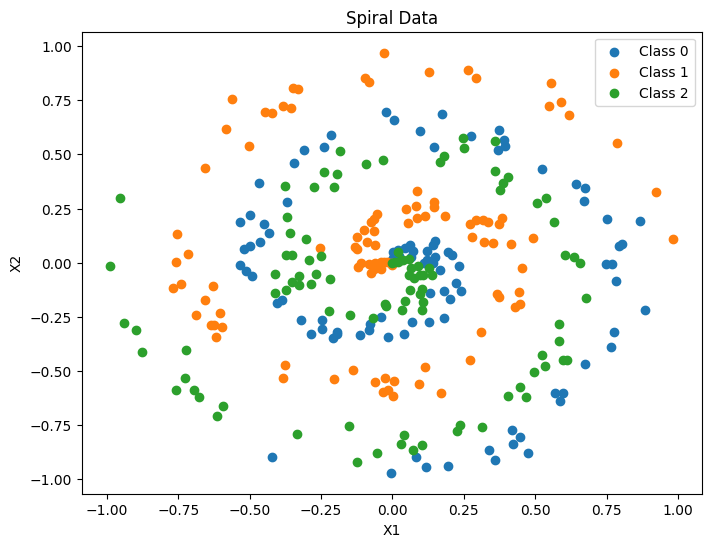

In [52]:
plt.figure(figsize=(8, 6))
for class_number in range(np.max(y) + 1):
    plt.scatter(X[y == class_number][:, 0], X[y == class_number][:, 1], label=f'Class {class_number}')
plt.title('Spiral Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [54]:
# This data has two features so

layer1 = Layer_Dense(2 , 5)
layer1.forward(X)


activation1 = Activation_ReLU() # This activation is for entire layer1 but it's not necessary to use the same activation for all neurons in the same layer 
activation1.forward(layer1.output)

activation1.output

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.0008297 , 0.        , 0.00071691, 0.        ],
       [0.        , 0.00101479, 0.        , 0.00076781, 0.00147614],
       ...,
       [0.07856604, 0.        , 0.09555328, 0.        , 0.        ],
       [0.        , 0.07477951, 0.        , 0.06768164, 0.        ],
       [0.06641908, 0.        , 0.08856974, 0.        , 0.        ]])

In [56]:
# Softmax activation => which is specifically used for the output layer in classification Task  
# gives me a probability distribution. 
# ReLU => not efficient because if i have (-10, -9) => both give me zero, so can't determine which class is correct  

# Softmax activation

In [58]:
output_layer = [4.8 , 1.21 , 2.385] 

In [60]:
e = math.e

In [61]:
e

2.718281828459045

In [62]:
exp_values = []

for output in output_layer : 
    exp_values.append(e**output)

In [63]:
norm_base = sum (exp_values)

In [3]:
norm_values = [ ]
for value in exp_values : 
    norm_values.append(value / norm_base)

NameError: name 'exp_values' is not defined

In [65]:
print(norm_values) # probability distribution . 

[0.8952826639572619, 0.024708306782099374, 0.0800090292606387]


In [66]:
print(sum(norm_values)) # sum is a built-in Python function

0.9999999999999999


In [67]:
## Re-implement Softmax activation¶ using numpy 

In [69]:
exp_values_np = np.exp(output_layer)
norm_values_np = exp_values_np / np.sum(exp_values_np) # normlization 

In [70]:
norm_values_np

array([0.89528266, 0.02470831, 0.08000903])

In [71]:
# batch of outputs for a batch of inputs 
output_layer_batchs= [[4.8 , 1.21 , 2.385],
                [8.9, 1.81, 0.2],
                [1.41,1.051, 0.026]] 

In [72]:
np.sum(output_layer_batchs) # sumation of all values in metrix 

21.792

In [73]:
np.sum( output_layer_batchs , axis = 0) # 0 sum of col

array([15.11 ,  4.071,  2.611])

In [76]:
np.sum( output_layer_batchs, axis = 1) # sum of the rows and this is what we need, each row for a specific sample 

array([ 8.395, 10.91 ,  2.487])

In [78]:
np.exp(output_layer_batchs)

array([[1.21510418e+02, 3.35348465e+00, 1.08590627e+01],
       [7.33197354e+03, 6.11044743e+00, 1.22140276e+00],
       [4.09595540e+00, 2.86051020e+00, 1.02634095e+00]])

In [79]:
np.sum( np.exp(output_layer_batchs) , axis = 1)

array([ 135.72296484, 7339.30538935,    7.98280655])

In [80]:
norm_values_b = np.exp(output_layer_batchs) / np.sum(output_layer_batchs , axis = 1 , keepdims = True) 

In [81]:
norm_values_b

array([[1.44741415e+01, 3.99462138e-01, 1.29351551e+00],
       [6.72041571e+02, 5.60077675e-01, 1.11952590e-01],
       [1.64694628e+00, 1.15018504e+00, 4.12682327e-01]])

In [82]:
# using OOP

In [83]:
class Activation_Softmax : 
    def forward(self , inputs):
        exp_values = np.exp(inputs - np.max (inputs , axis = 1 , keepdims = True)) # "max trick"
        probabilities  = exp_values / np.sum(exp_values , axis = 1 , keepdims =True ) # The first row is divided by the first element 
        self.output = probabilities

In [85]:
exp_values =np.max(output_layer_batchs, axis=1, keepdims=True) # give me the max value in each row 

In [86]:
print(exp_values)

[[4.8 ]
 [8.9 ]
 [1.41]]


In [88]:
exp_values = output_layer_batchs - np.max(output_layer_batchs , axis = 1 , keepdims = True)

In [89]:
exp_values

array([[ 0.   , -3.59 , -2.415],
       [ 0.   , -7.09 , -8.7  ],
       [ 0.   , -0.359, -1.384]])

In [90]:
inputs = np.array([1000, 1001, 1002])

In [91]:
probabilities = np.exp(inputs) / np.sum(np.exp(inputs))
print(probabilities)

[nan nan nan]


C:\Users\IMOE001\AppData\Local\Temp\ipykernel_21880\2967752028.py:1: RuntimeWarning: overflow encountered in exp
  probabilities = np.exp(inputs) / np.sum(np.exp(inputs))
C:\Users\IMOE001\AppData\Local\Temp\ipykernel_21880\2967752028.py:1: RuntimeWarning: invalid value encountered in divide
  probabilities = np.exp(inputs) / np.sum(np.exp(inputs))


In [2]:
"""
The above case called Numerical Stability  =>  Exponentiating large numbers can lead to numerical overflow, w
here the resulting values are too large to be represented accurately by the floating-point format used in computers
so to solve this problem u can use "max trick" before Calculating exponentials
"""

'\nThe above case called Numerical Stability  =>  Exponentiating large numbers can lead to numerical overflow, w\nhere the resulting values are too large to be represented accurately by the floating-point format used in computers\nso to solve this problem u can use "max trick" before Calculating exponentials\n'

# Testing Phase

In [92]:
# Experience everything we have taken so far

X, y = spiral_data( samples=(100) , classes=3)# 100 samples represented by 2 features classify on 3 classes

layer1 = Layer_Dense( 2 , 3)
activation1 =  Activation_ReLU()

layer2 = Layer_Dense(3, 3) # output layer 
activation2 = Activation_Softmax() 

layer1.forward(X)
activation1. forward (layer1.output)

layer2. forward(activation1.output)
activation2. forward(layer2.output)

print (activation2.output) # Show me the results just for the first 50 samples 

[[0.33333333 0.33333333 0.33333333]
 [0.33335127 0.33334172 0.333307  ]
 [0.33338435 0.3333522  0.33326345]
 [0.3333791  0.33336815 0.33325275]
 [0.3332563  0.33351294 0.33323076]
 [0.33326387 0.33353688 0.33319925]
 [0.33318564 0.33366743 0.33314693]
 [0.33349063 0.33339147 0.3331179 ]
 [0.3334073  0.33348097 0.33311173]
 [0.33313794 0.33377533 0.33308674]
 [0.33322117 0.33371806 0.33306077]
 [0.33310656 0.33384628 0.33304715]
 [0.33362169 0.33343986 0.33293845]
 [0.33305399 0.33396519 0.33298083]
 [0.33296513 0.33416613 0.33286875]
 [0.33292371 0.33425978 0.33281651]
 [0.33289959 0.33431432 0.33278609]
 [0.33293537 0.33423342 0.33283121]
 [0.33269028 0.33445023 0.33285949]
 [0.33281993 0.33449442 0.33268565]
 [0.33278863 0.33456517 0.3326462 ]
 [0.33284472 0.33443837 0.33271691]
 [0.33274029 0.33467445 0.33258526]
 [0.33244395 0.3348016  0.33275445]
 [0.33246783 0.33482816 0.33270402]
 [0.33244095 0.33488447 0.33267459]
 [0.33272618 0.33470635 0.33256747]
 [0.33181598 0.33531504 0.33

In [93]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

   # Loss Function - Cross Entropy  For Classifcation 

In [96]:
# One hot encoding is a vector of zeros and one, the length of it = the number of classes we have. 
# log without specific basic = mean that the basic is e so (len) natural log 

# e ** x = b === len(b) = x e rias to what to get b 


In [97]:
softmax_output = [0.7,0.2,0.1]
target_output = [1, 0,0]

In [98]:
loss = -(math.log(softmax_output[0])*target_output[0]+
        math.log(softmax_output[1])*target_output[1]+
        math.log(softmax_output[2])*target_output[2])
# use negative sign cauze the probability is between [0,1] => log[0-1] is negative . -(-) => + 

In [99]:
loss

0.35667494393873245

In [100]:
# to smplify formula 
loss2 = -math.log(softmax_output[0])

In [101]:
loss2 # same

0.35667494393873245

In [102]:
class Loss: #a base class for different types of loss functions
    def calculate(self, output, y):
        sample_losses = self.forward(output, y) #computing the loss for each individual sample in the batch.
        data_loss = np.mean(sample_losses)
        return data_loss
    
class Loss_CategoricalCrossentropy(Loss): #subclass
    def forward(self, y_pred, y_true):
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7) # to avoid log(0) issue 
        samples = len(y_pred)
        sample_losses = np.zeros(samples)
        # the true_y is not one hot encoded
        for i in range(samples):
            probabilities = y_pred_clipped[i]
            true_label = y_true[i]
            loss = -np.log(probabilities[true_label]) # id the prob/confidence of target class is small then the -log => (loss) is large
            sample_losses[i] = loss
        return sample_losses

In [103]:
y_pred_clipped = np.clip(activation2.output, 1e-7, 1 - 1e-7)

In [104]:
len(y_pred_clipped[np.arange(len(activation2.output)), y])

300

In [107]:
entopy_loss_function = Loss_CategoricalCrossentropy ()
loss = entopy_loss_function.calculate(activation2.output, y)

In [108]:
loss

1.0990548947582486